In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' 
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train, n_test, num_inputs,batch_size = 20, 100, 200,8

true_w,ture_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, ture_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)

test_data = d2l.synthetic_data(true_w, ture_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def init_params():
    W = torch.normal(0, 0.01, size=(num_inputs, 1),requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [W, b]

def l2_penalty(W):
    return torch.sum(W.pow(2)) / 2

In [4]:
def train(lambd):
    w,b = init_params()
    net,loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())



L2 norm of w: 0.141604945063591


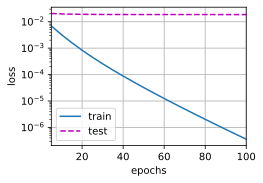

In [5]:
train(lambd=0)

L2 norm of w: 0.03327208012342453


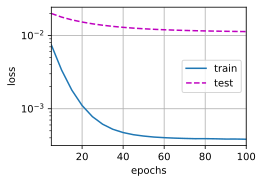

In [6]:
train(lambd=3)

In [7]:
# 4.5.4 简洁实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    
    loss = nn.MSELoss(reduction='none')
    num_epochs,lr = 100,0.003
    trainer = torch.optim.SGD([{'params':net[0].weight,'weight_decay':wd},{'params':net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])

    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
            
    print('L2 norm of w:', net[0].weight.norm().item())


L2 norm of w: 13.812834739685059


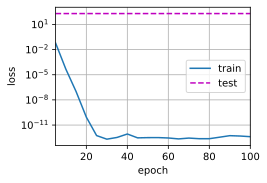

In [8]:
train_concise(0)

L2 norm of w: 0.06710701435804367


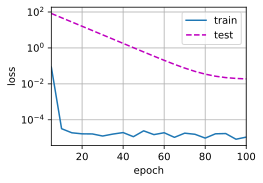

In [10]:
train_concise(6)